## **Answer 1: ANN Model based on the given data**

### **Codes**


[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01 0.000e+00]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01 1.000e+00]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01 0.000e+00]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01 1.000e+00]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01 1.000e+00]]
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

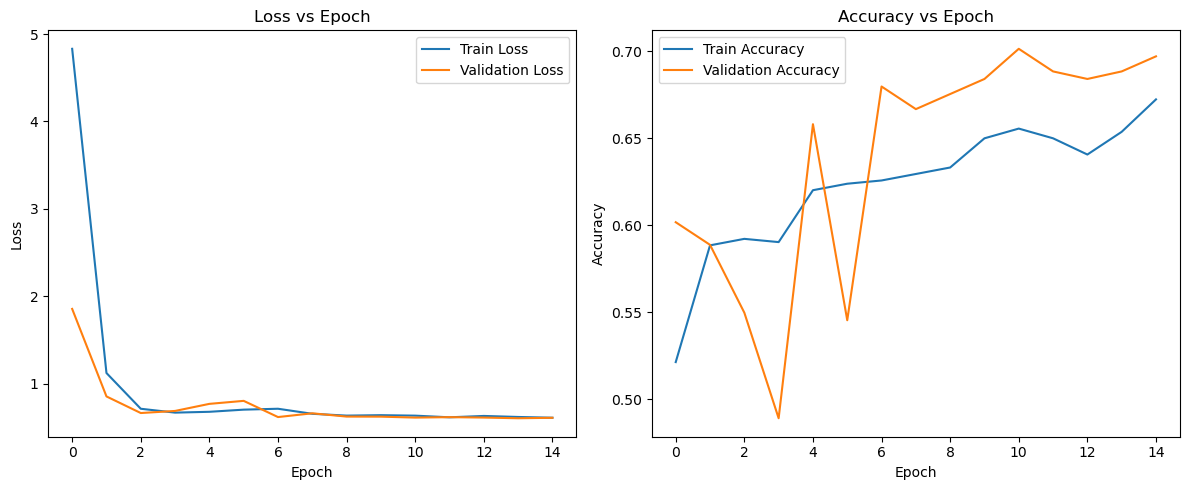

In [4]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split=0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on full dataset:", results)
# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## **Results**

**Loss and Accuracy on trained dataset:** [0.6170157194137573, 0.6744791865348816]

## **Answer 2: Repeated Model Evaluation: Analysis of Loss and Accuracy Variability**

The model was trained three times, and the results from each run are summarized in this section.

## **1st Time**

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6413 
Loss and Accuracy on trained dataset: [0.6413080096244812, 0.6510416865348816]


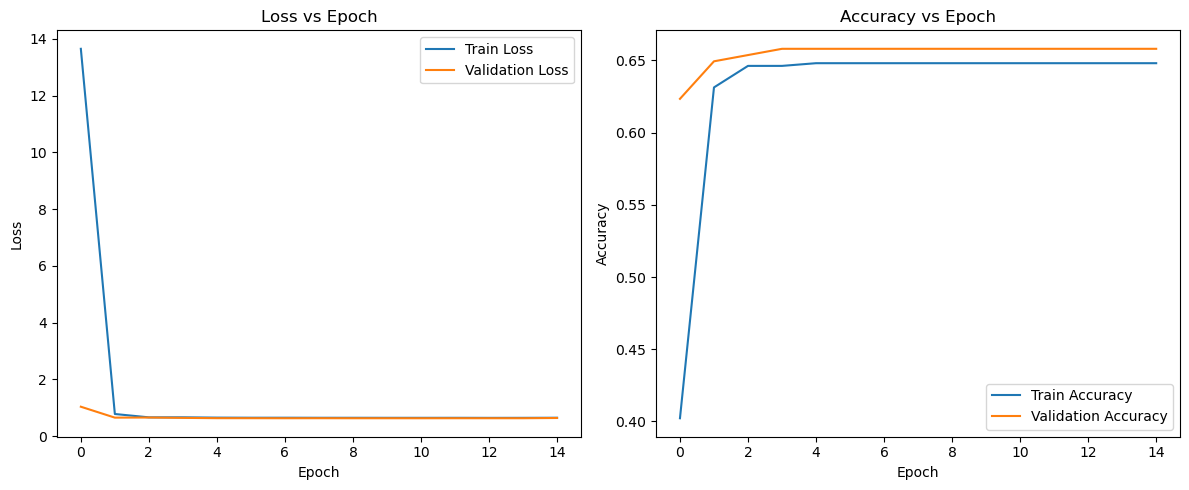

In [9]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split=0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**1st Time:** Loss and Accuracy on trained dataset: [0.6413080096244812, 0.6510416865348816]

## **2nd Time**

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6137 
Loss and Accuracy on trained dataset: [0.6137263774871826, 0.67578125]


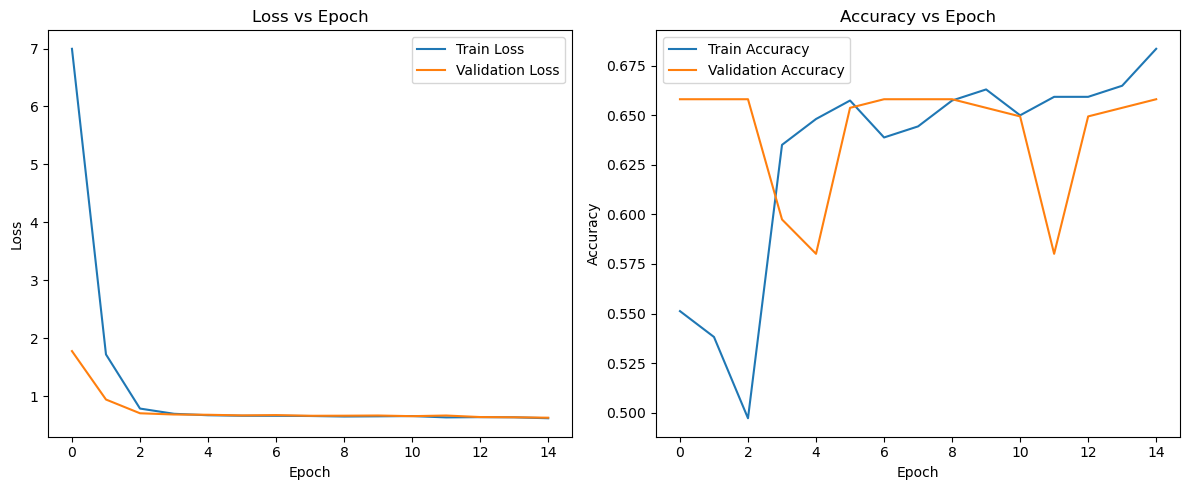

In [8]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split=0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**2nd Time:** Loss and Accuracy on trained dataset: [0.6137263774871826, 0.67578125]

## **3rd Time**

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6797 - loss: 0.7044 
Loss and Accuracy on trained dataset: [0.7043917775154114, 0.6796875]


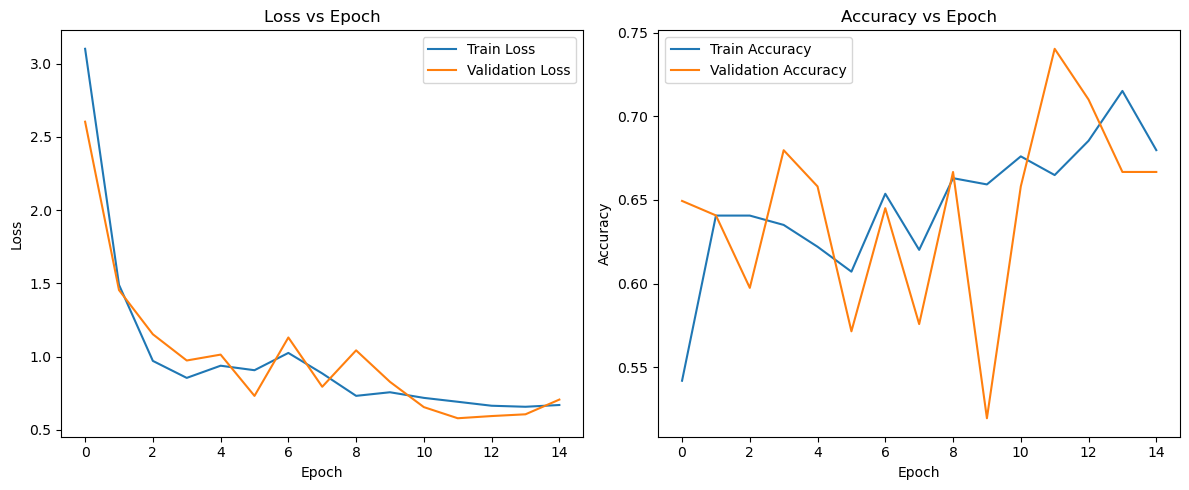

In [10]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**3rd Time:** Loss and Accuracy on trained dataset: [0.7043917775154114, 0.6796875]

### **Summarized Table**

| Run       | Loss       | Accuracy   |
|-----------|------------|------------|
| 1st Time  | 0.6413     | 0.6510     |
| 2nd Time  | 0.6137     | 0.6758     |
| 3rd Time  | 0.7044     | 0.6797     |



The model was trained three times using identical architecture and hyperparameters. The observed losses were 0.6413, 0.6137, and 0.7044, while the corresponding accuracies were 0.6510, 0.6758, and 0.6797. 

The results (loss and accuracy) are **not the same each time**. They vary slightly due to random initialization of network weights, random data splitting during training (using validation_split = 0.3), and the stochastic nature of the Adam optimizer. Based on my research, this variation is normal in neural network training. To achieve consistent results, setting a random seed can help. 

In my understanding, the best way to report the model’s performance is by training it multiple times and presenting the average accuracy along with the standard deviation. For example, in this case, the model’s performance could be reported as an average accuracy of approximately 0.6688 ± 0.012.

## **Answer 3: Hyperparameter Tuning and Model Optimization**


In this section, the goal is to determine whether the model’s accuracy can be improved by adjusting various aspects of the neural network configuration. These include:

- Increasing Number of Training Epochs,
- Changing Learning Rate
- Increasing Number of Hidden Layers and Nodes
- Using the Tanh Activation Function Instead of ReLU and
- Changing Batch size (8,16 and 64)

By systematically modifying these parameters **one at a time and combining together at the end**, the aim is to identify configurations that lead to better performance and more consistent results.

The previous model architecture consisted of an input layer with 6 units, followed by two hidden layers with 10 and 6 units respectively, both using ReLU activation functions. The output layer contained a single unit with a Sigmoid activation function. Training was performed using the Adam optimizer with a learning rate of 0.01 and the binary crossentropy loss function. The model was trained over 15 epochs with a default batch size of 32, and a validation split of 0.3 was applied. Overall, the model achieved an accuracy of approximately 67%, with loss values ranging between 0.61 and 0.70.

## Case 1.1: Changing Epoch from 15 to 50

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7396 - loss: 0.5312 
Loss and Accuracy on trained dataset: [0.531234085559845, 0.7395833134651184]


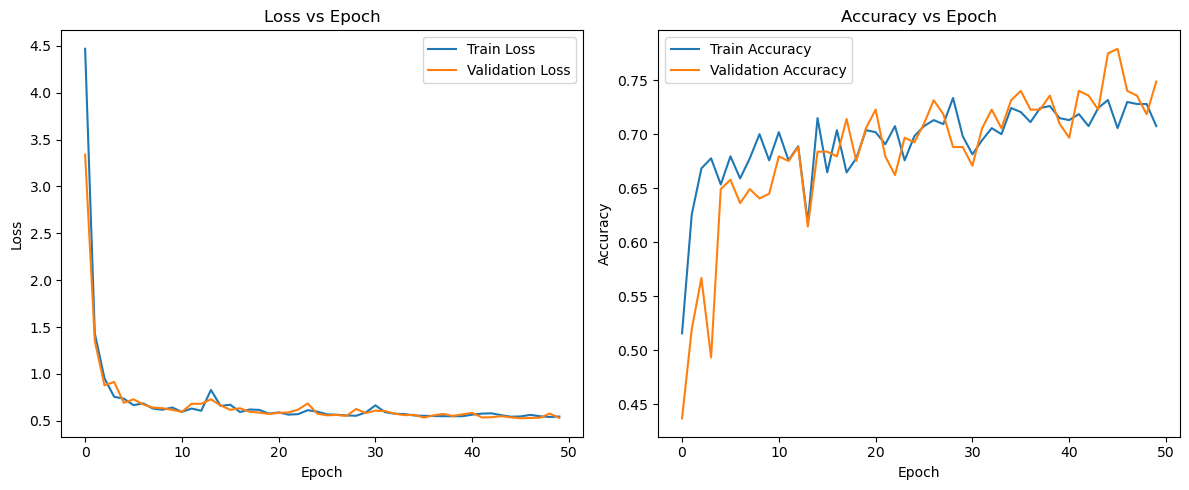

In [11]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 50, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Case 1.1, Loss and Accuracy on trained dataset: [0.531234085559845, 0.7395833134651184]

## Case 1.2: Changing Epoch from 15 to 100

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7591 - loss: 0.4901 
Loss and Accuracy on trained dataset: [0.49009084701538086, 0.7591145634651184]


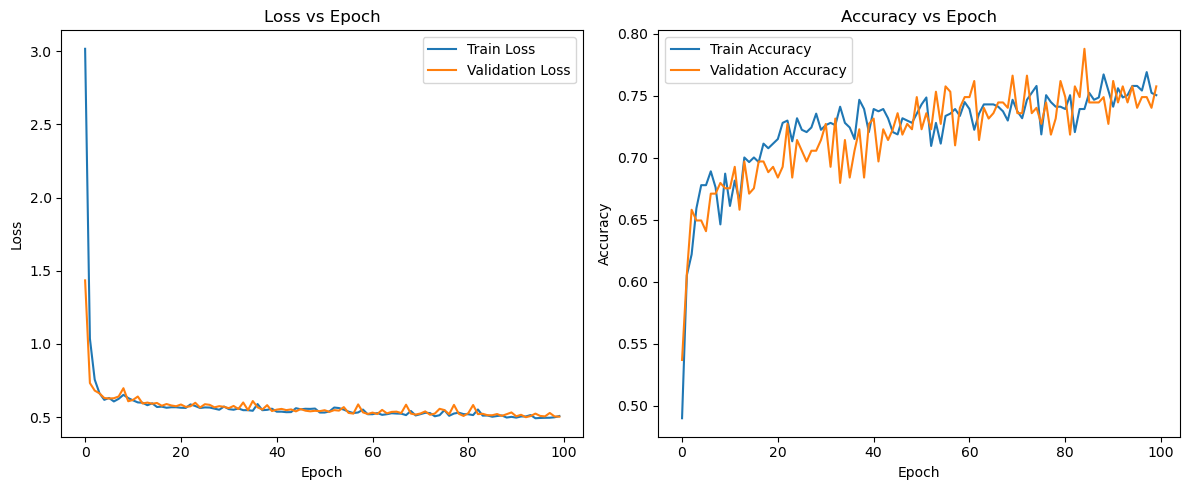

In [12]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 100, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Case 1.2, Loss and Accuracy on trained dataset: [0.49009084701538086, 0.7591145634651184]

#### **Summarized Table**

| Case       | Epochs | Loss       | Accuracy   |
|------------|--------|------------|------------|
| Run 1      | 15     | 0.6413     | 0.6510     |
| Run 2      | 15     | 0.6137     | 0.6758     |
| Run 3      | 15     | 0.7044     | 0.6797     |
| Case 1.1   | 50     | 0.5312     | 0.7396     |
| Case 1.2   | 100    | 0.4901     | 0.7591     |


From the results, it is generally found that when the number of epochs increases, the model’s accuracy tends to improve while the loss decreases — which is the desired and expected outcome. However, as the number of epochs increases, I noticed that the training time also becomes longer. In addition, using too many epochs can lead to overfitting, where the model learns the training data too well and performs poorly on unseen data. It may also increase computational cost and resource usage, especially for larger datasets.

## Case 2.1: Changing Learning Rate from 0.01 to 0.001

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6497 - loss: 0.7420 
Loss and Accuracy on trained dataset: [0.741990864276886, 0.6497395634651184]


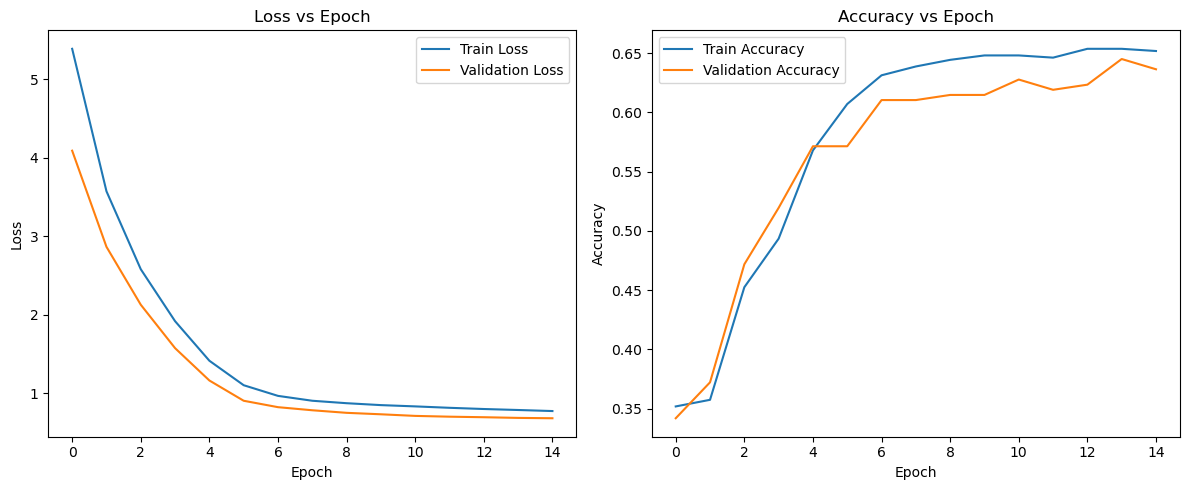

In [17]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Case 2.1: Loss and Accuracy on trained dataset: [0.741990864276886, 0.6497395634651184]

## Case 2.2: Changing Learning Rate from 0.01 to 0.0001

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 2.8247 
Loss and Accuracy on trained dataset: [2.824660301208496, 0.5794270634651184]


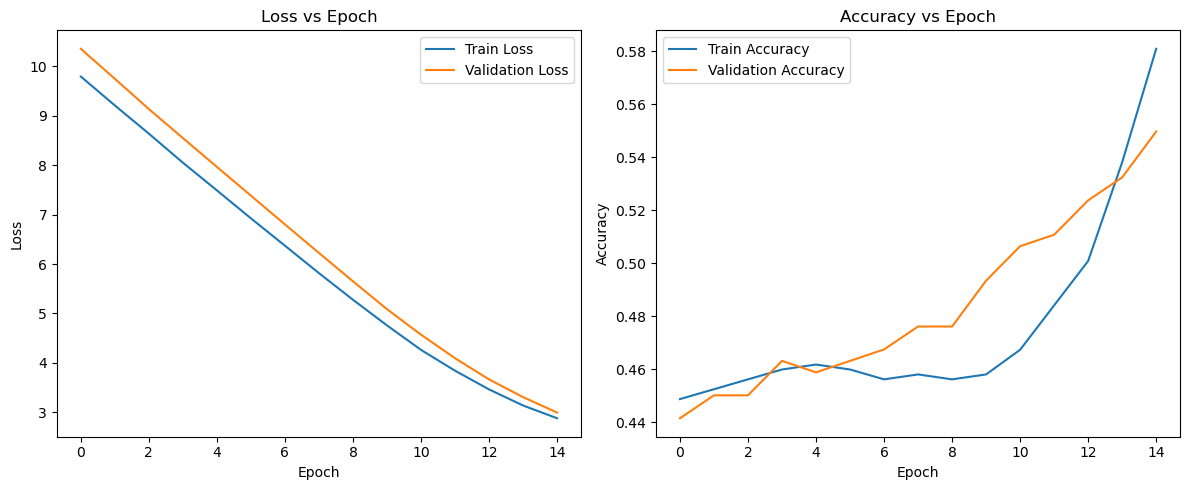

In [18]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Case 2.2: Loss and Accuracy on trained dataset: [2.824660301208496, 0.5794270634651184]

## Case 2.3: Changing Learning Rate from 0.01 to 0.1

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6469 
Loss and Accuracy on trained dataset: [0.6469322443008423, 0.6510416865348816]


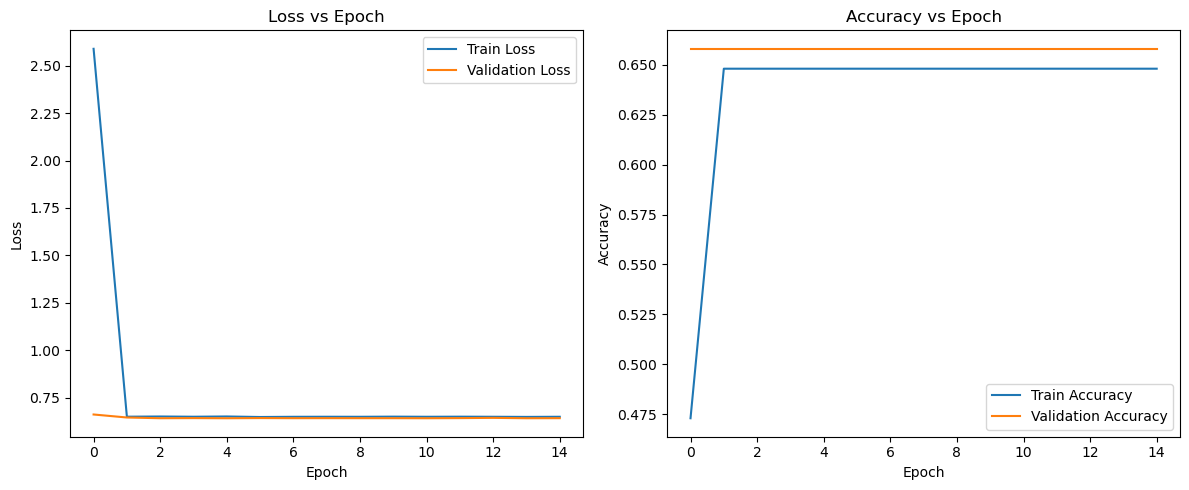

In [20]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([		                # Stack layers one after another in order to create ANN model
	layers.Input(shape=(6,)),                   # 6 neurons in Input layer 
	layers.Dense(10, activation ='relu'), 		# 10 neurons in Hidden Layer 1 using ReLU
	layers.Dense(6, activation ='relu'),	 	# 6 neurons in Hidden Layer 2 using ReLU
	layers.Dense(1, activation ='sigmoid') 	    # 1 neuron in Output layer using Sigmoid
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Case 2.3: Loss and Accuracy on trained dataset: [0.6469322443008423, 0.6510416865348816]

#### **Summarized Table**

| Case       | Learning Rate | Loss       | Accuracy   |
|------------|----------------|------------|------------|
| Run 1      | 0.01           | 0.6413     | 0.6510     |
| Run 2      | 0.01           | 0.6137     | 0.6758     |
| Run 3      | 0.01           | 0.7044     | 0.6797     |
| Case 2.1   | 0.001          | 0.7420     | 0.6497     |
| Case 2.2   | 0.0001         | 2.8247     | 0.5794     |
| Case 2.3   | 0.1            | 0.6469     | 0.6510     |

When the learning rate was decreased (0.001 and 0.0001), the model trained too slowly and failed to converge, resulting in higher loss. When the learning rate was increased too much (0.1), the training became unstable. Therefore, it can be concluded that the default value of 0.01 gave the most stable and accurate performance.

## Case 3: Increasing Number of Hidden Layers

The model is now modified by adding more hidden layer and neurons with the following code:

#Improved ANN model
model = keras.Sequential([
    layers.Input(shape=(6,)),
    layers.Dense(12, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


The improved model architecture builds upon the previous design by introducing an additional hidden layer and increasing the number of nodes. It begins with an input layer of 6 units, followed by three hidden layers with 12, 8, and 4 units respectively, each using the ReLU activation function. The output layer remains a single unit with a Sigmoid activation function, suitable for binary classification tasks. The model continues to use the Adam optimizer with a learning rate of 0.01 and the binary crossentropy loss function. This configuration aims to enhance the model’s learning capacity and performance by deepening the network and refining its internal representations.

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6510 - loss: 0.6468
Loss and Accuracy on trained dataset: [0.6468165516853333, 0.6510416865348816]


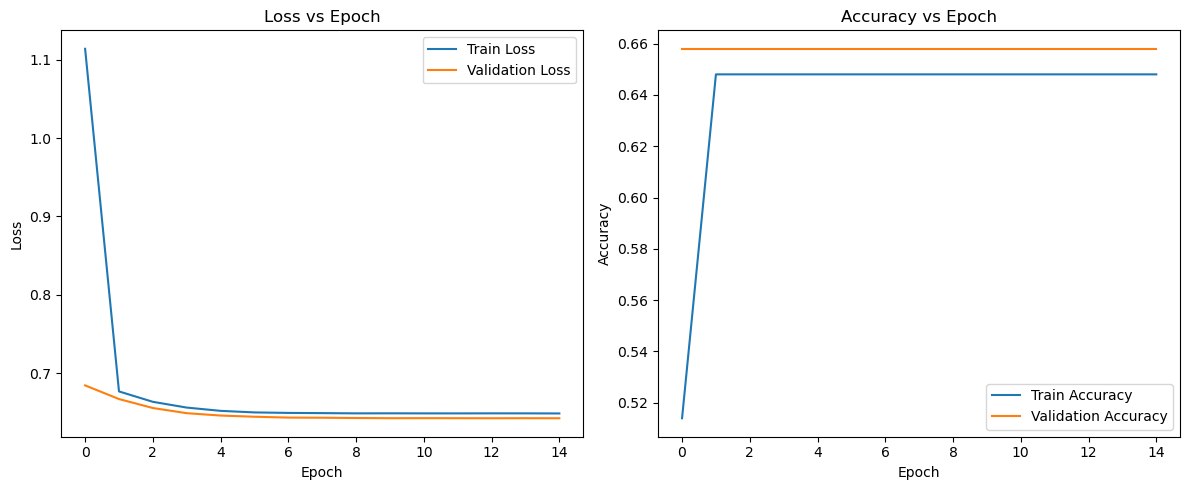

In [29]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Improved ANN model
model = keras.Sequential([
    layers.Input(shape=(6,)),
    layers.Dense(12, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Case 3, Loss and Accuracy on trained dataset: [0.6468165516853333, 0.6510416865348816]

#### **Summarized Table**

| Case                                | Loss       | Accuracy   |
|-------------------------------------|------------|------------|
| 1st Time                            | 0.6413     | 0.6510     |
| 2nd Time                            | 0.6137     | 0.6758     |
| 3rd Time                            | 0.7044     | 0.6797     |
| Modified Model (Additional Layers)  | 0.6468     | 0.6510     |


In this case, increasing the number of hidden layers from two to three (with neuron sizes of 12, 8, and 4) without changing any other parameters did not significantly improve the model’s performance. The loss and accuracy values remained almost the same as in the default configuration. This suggests that the current dataset is relatively simple, and adding more depth to the network does not provide additional benefits. However, combining an increased number of hidden layers with other adjustments—such as higher epochs or optimized learning rates—may lead to improved results.

## Case 4.1: Using the Tanh Activation Function Instead of ReLU

In this case, **Tanh** activation function will be used instead of ReLU in hidden layer.

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6302 - loss: 0.6157
Loss and Accuracy on trained dataset: [0.6156783103942871, 0.6302083134651184]


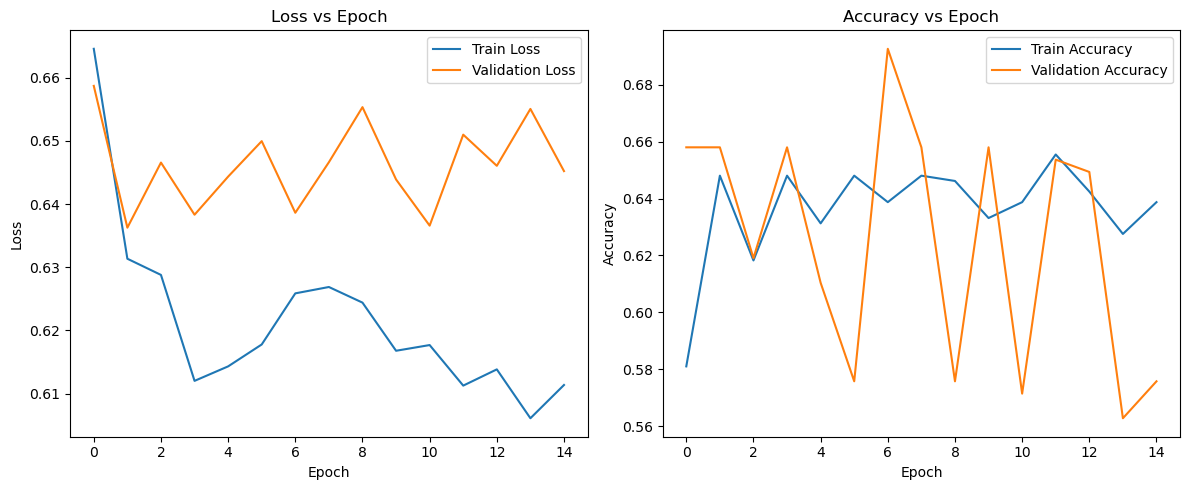

In [33]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using tanh & Sigmoid 
model = keras.Sequential([
    layers.Input(shape=(6,)),                   # 6 input features
    layers.Dense(10, activation='tanh'),        # Hidden Layer 1 with tanh
    layers.Dense(6, activation='tanh'),         # Hidden Layer 2 with tanh
    layers.Dense(1, activation='sigmoid')       # Output Layer with sigmoid for binary output
])


# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Case 4.1, Loss and Accuracy on trained dataset: [0.6156783103942871, 0.6302083134651184]

## Case 4.2: Using the Tanh Activation Function with Additional Hidden Layers and Nodes

In this case, **Tanh** activation function will be used instead of ReLU in hidden layer with additional layers and nodes.

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 0.6054 
Loss and Accuracy on trained dataset: [0.6054374575614929, 0.6432291865348816]


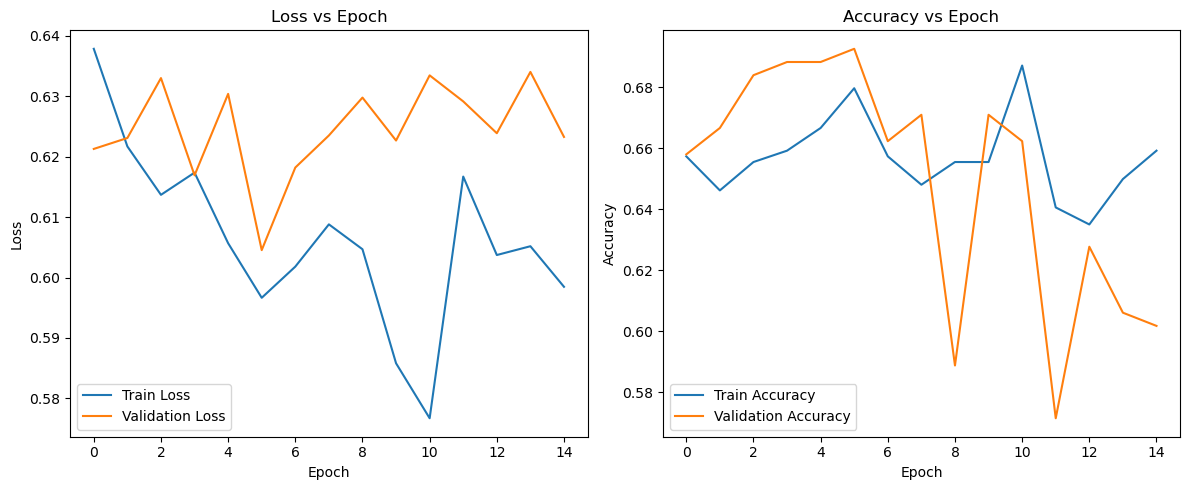

In [34]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using Tanh & Sigmoid with additional layers and nodes
model = keras.Sequential([
    layers.Input(shape=(6,)),
    layers.Dense(12, activation='tanh'),
    layers.Dense(8, activation='tanh'),
    layers.Dense(4, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])


# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x,y, validation_split = 0.3, epochs = 15, verbose = 0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Case 4.2, Loss and Accuracy on trained dataset: [0.6054374575614929, 0.6432291865348816]

#### **Summarized Table**

| Case                                | Activation | Loss       | Accuracy   |
|-------------------------------------|------------|------------|------------|
| 1st Time                            | ReLU       | 0.6413     | 0.6510     |
| 2nd Time                            | ReLU       | 0.6137     | 0.6758     |
| 3rd Time                            | ReLU       | 0.7044     | 0.6797     |
| Case 4.1 (Tanh)                     | Tanh       | 0.6157     | 0.6302     |
| Case 4.2 (Tanh + Extra Layer)       | Tanh       | 0.6054     | 0.6432     |


Replacing ReLU with tanh in the hidden layers (Case 4.1 and Case 4.2) did not result in significant improvement in model accuracy or loss. This is likely because the dataset is relatively simple, and both activations can approximate the relationship between inputs and outputs equally well. The tanh function outputs values between -1 and 1, but since most input variables are positive and normalized, its effect is minimal compared to ReLU. Hence, for this dataset, ReLU remains a suitable and efficient choice.

## Case 5: Changing Batch size (8,16 and 64)

The original code (with default batch size of 32) was modified to experiment with different batch sizes. **A list of batch sizes [8, 16, 32, 64]** was added, and a for-loop was used to train the model separately for each batch size. Inside the loop, a fresh model is created each time using the **create_model()** function to ensure independent training. After training, the model is evaluated on the full dataset, and the loss and accuracy for each batch size are printed. This allows comparison of how batch size affects model performance and convergence.

Batch size 8 → Loss: 0.5442, Accuracy: 0.7305


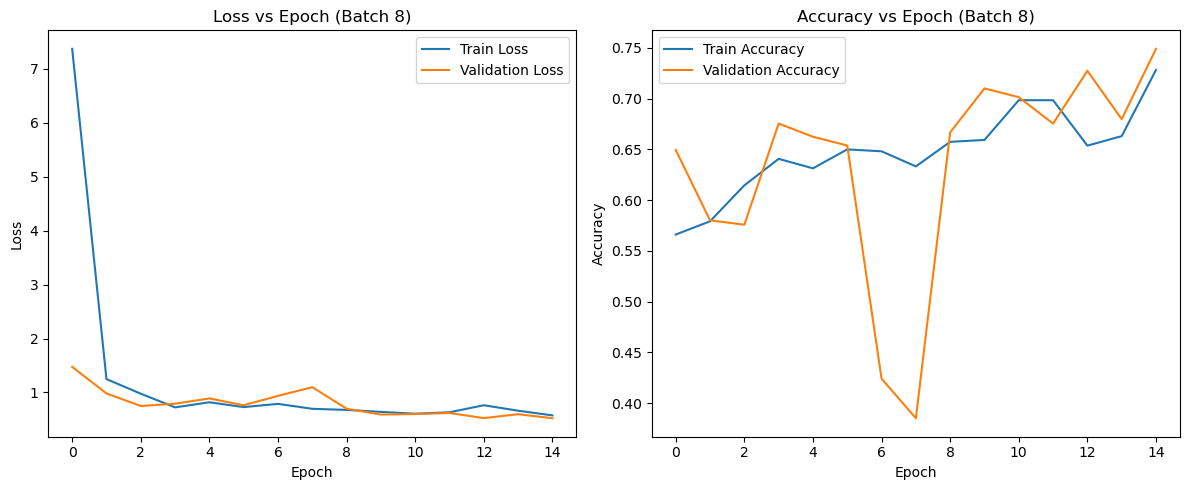

Batch size 16 → Loss: 0.5791, Accuracy: 0.7057


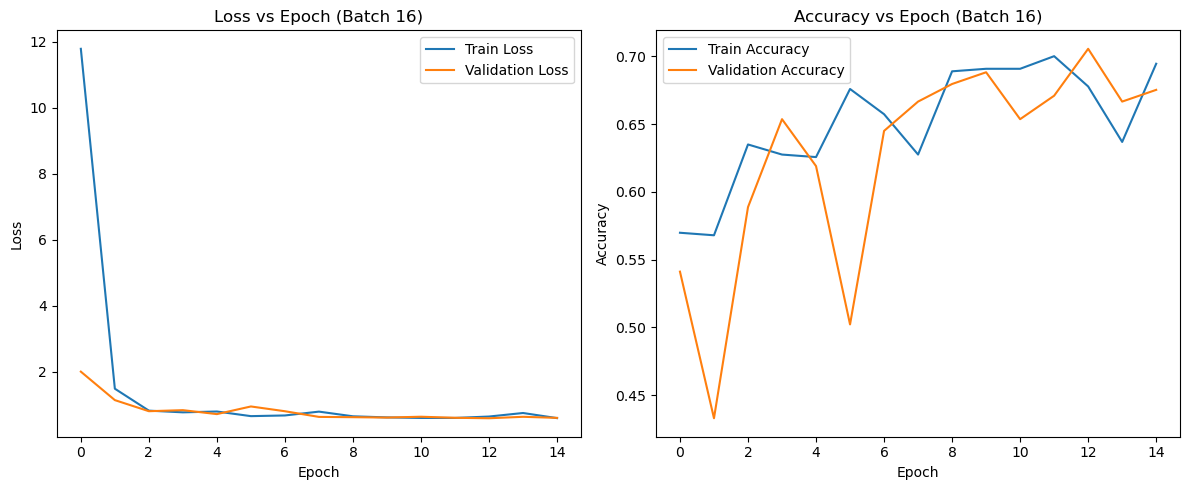

Batch size 32 → Loss: 0.6356, Accuracy: 0.6576


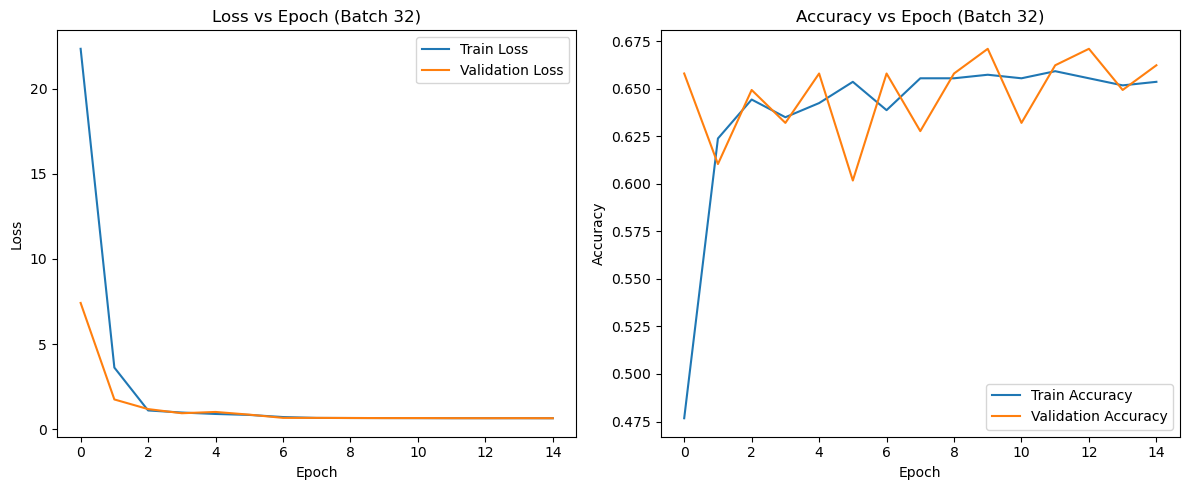

Batch size 64 → Loss: 0.6871, Accuracy: 0.6719


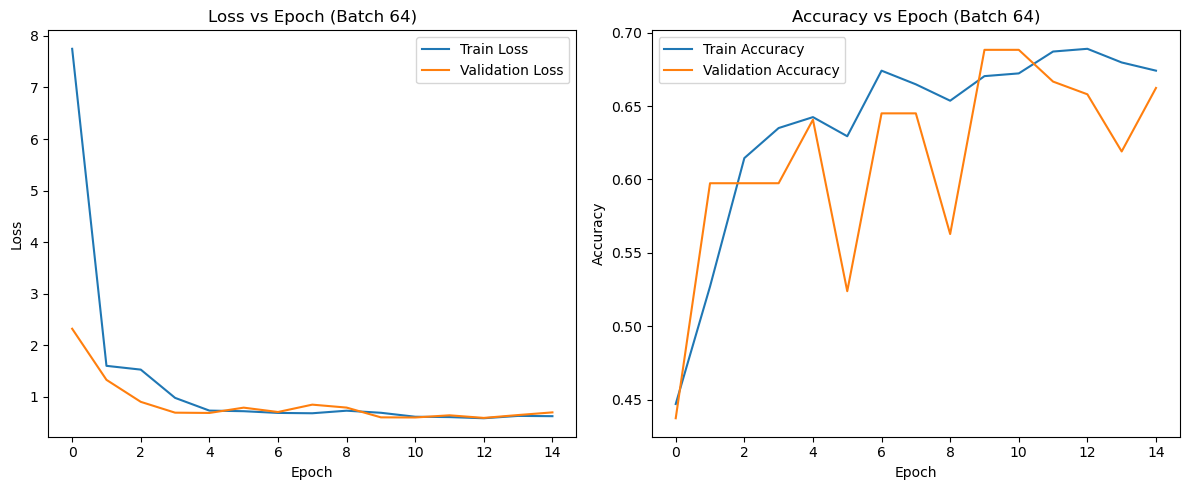

In [37]:
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter=',') 
# print(dataset[:10,:]) # Uncomment to see first ten rows

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs: columns 1-6
y = dataset[:, 8]     # Output: column 9

# Function to create the model
def create_model():
    model = keras.Sequential([
        layers.Input(shape=(6,)),             # Input layer with 6 neurons
        layers.Dense(10, activation='relu'),  # Hidden layer 1
        layers.Dense(6, activation='relu'),   # Hidden layer 2
        layers.Dense(1, activation='sigmoid') # Output layer
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.01),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# List of batch sizes to test
batch_sizes = [8, 16, 32, 64]

# Loop over batch sizes
for batch in batch_sizes:
    model = create_model()  # Create a fresh model each time
    history = model.fit(x, y, validation_split=0.3, epochs=15, batch_size=batch, verbose=0)
    results = model.evaluate(x, y, verbose=0)
    print(f"Batch size {batch} → Loss: {results[0]:.4f}, Accuracy: {results[1]:.4f}")
    
    # Optional: plot Loss & Accuracy for this batch size
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title(f'Loss vs Epoch (Batch {batch})')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot(history.history['accuracy'], label='Train Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title(f'Accuracy vs Epoch (Batch {batch})')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()


#### **Summarized Table**

| Case             | Batch Size | Loss   | Accuracy |
|------------------|------------|--------|----------|
| 1st Time         | 32         | 0.6413 | 0.6510   |
| 2nd Time         | 32         | 0.6137 | 0.6758   |
| 3rd Time         | 32         | 0.7044 | 0.6797   |
| Batch Size Test  | 8          | 0.5442 | 0.7305   |
| Batch Size Test  | 16         | 0.5791 | 0.7057   |
| Batch Size Test  | 32         | 0.6356 | 0.6576   |
| Batch Size Test  | 64         | 0.6871 | 0.6719   |

Based on the results, it is observed that as the batch size increases, the loss also increases, indicating that the model fits the data better with smaller batches. Similarly, the accuracy generally decreases with larger batch sizes, with the exception of batch 64, which performs slightly better than batch 32 but still worse than batch sizes 8 and 16. This suggests that smaller batch sizes, such as 8 or 16, provide better generalization for the dataset of 780 rows. The likely reason is that smaller batches introduce more stochasticity in gradient updates, allowing the model to escape shallow or local minima, whereas larger batches make training smoother, which can reduce the model’s ability to generalize. Therefore, for this dataset, a small batch size—particularly 8—appears to be the most effective choice.


## **Final Optimized Neural Network Setup**

#### **Final Summarized Table**

| Case                                | Description                                | Epochs | LR     | Batch Size | Loss   | Accuracy |
|-------------------------------------|--------------------------------------------|--------|--------|------------|--------|----------|
| Default Run 1                       | Baseline                                   | 15     | 0.01   | 32         | 0.6413 | 0.6510   |
| Default Run 2                       | Baseline                                   | 15     | 0.01   | 32         | 0.6137 | 0.6758   |
| Default Run 3                       | Baseline                                   | 15     | 0.01   | 32         | 0.7044 | 0.6797   |
| Case 1.1                            | Epochs increased to 50                     | 50     | 0.01   | 32         | 0.5312 | 0.7396   |
| Case 1.2                            | Epochs increased to 100                    | 100    | 0.01   | 32         | 0.4901 | 0.7591   |
| Case 2.1                            | LR changed to 0.001                        | 15     | 0.001  | 32         | 0.7420 | 0.6497   |
| Case 2.2                            | LR changed to 0.0001                       | 15     | 0.0001 | 32         | 2.8247 | 0.5794   |
| Case 2.3                            | LR changed to 0.1                          | 15     | 0.1    | 32         | 0.6469 | 0.6510   |
| Case 3                              | Added hidden layer and neurons             | 15     | 0.01   | 32         | 0.6468 | 0.6510   |
| Case 4.1                            | Tanh activation instead of ReLU            | 15     | 0.01   | 32         | 0.6157 | 0.6302   |
| Case 4.2                            | Tanh + additional hidden layer             | 15     | 0.01   | 32         | 0.6054 | 0.6432   |
| Case 5 (Batch Size 8)               | Smaller batch size                         | 15     | 0.01   | 8          | 0.5442 | 0.7305   |
| Case 5 (Batch Size 16)              | Smaller batch size                         | 15     | 0.01   | 16         | 0.5791 | 0.7057   |
| Case 5 (Batch Size 32)              | Default batch size                         | 15     | 0.01   | 32         | 0.6356 | 0.6576   |
| Case 5 (Batch Size 64)              | Larger batch size                          | 15     | 0.01   | 64         | 0.6871 | 0.6719   |

Based on the results from each case, the final model configuration will integrate the most effective hyperparameter adjustments. The selected settings include: 100 epochs, the default learning rate of 0.01, the ReLU activation function, and an enhanced architecture with additional hidden layers and nodes. Additionally, a batch size of 8 will be used to further improve performance.

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.4884 
Loss and Accuracy on trained dataset: [0.48843279480934143, 0.7708333134651184]


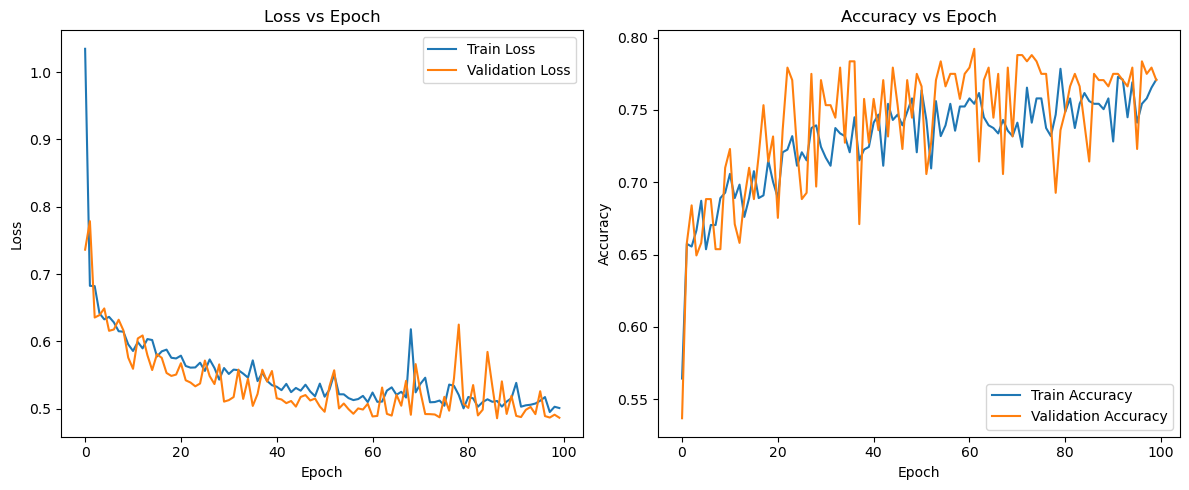

In [44]:
# Final Optimized Neural Network Setup
# Load relevant modules
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Import & Check the data 
dataset = np.loadtxt('flood_var.csv', delimiter = ',') 
# print(dataset[:10,:]) # Printing the first ten rows of given csv file

# Define Inputs & Outputs
x = dataset[:, 0:6]   # Inputs are data from 1st to 6th Columns of given csv file
y = dataset[:, 8]	  # Outputs are data from 9th Columns 

# Build ANN model using ReLU & Sigmoid 
model = keras.Sequential([
    layers.Input(shape=(6,)),
    layers.Dense(12, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile Model using Adam and Calculate Loss and Accuracy
model.compile(keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])		
                # Adam to adjust weights to minimize error
				# compares how close predicted probability is to the true label (0 & 1)

# Train the Model for 15 Epochs using 30% of the data for Validation
history = model.fit(x, y, validation_split=0.3, epochs=100, batch_size=8, verbose=0)

# Calculate Loss and Accuracy
results = model.evaluate(x,y) 
print("Loss and Accuracy on trained dataset:", results)

# Calculate predicted probabilities and convert to binary class labels (1 if > 0.5, else 0)
predictions = (model.predict(x, verbose=0) > 0.5).astype(int)
#print(predictions)

# Create 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss vs Epoch 
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss vs Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot 2: Accuracy vs Epoch
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy vs Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

For Final Optimized Neural Network Setup, Loss and Accuracy on trained dataset: [0.48843279480934143, 0.7708333134651184]

## **Final Answer for Question 3**

Yes, the model’s accuracy was significantly improved by systematically adjusting key hyperparameters. The default configuration from the lecture yielded accuracy values between 65.10% and 67.97%, with loss values ranging from 0.61 to 0.70 across three runs. In contrast, the final optimized model achieved an accuracy of **77.08%** and a reduced loss of **0.4884**, demonstrating a clear performance gain.

The best configuration integrated the most effective adjustments:

- Epochs: Increased from 15 to 100
- Learning Rate: Maintained at the default 0.01
- Activation Function: ReLU retained for hidden layers
- Architecture: Enhanced with one more additional hidden layers and more nodes
- Batch Size: Reduced to 8, which improved generalization

This setup outperformed the default from lecture by:
- Reducing overfitting through deeper architecture
- Allowing more learning cycles with increased epochs
- Improving gradient updates with a smaller batch size

## **Answer 4: ANN Model for the given data**

The final model demonstrates strong predictive capability for flood events. With an accuracy of **77.08%**, it shows a clear improvement in identifying flood-related patterns compared to the default setup. The lower loss value of **0.4884** also indicates greater confidence in its predictions.

While this accuracy suggests the model is effectively capturing flood events, I believe there is still room for improvement. In class, only the fundamentals were covered due to time and curriculum constraints, which limited the depth of model optimization. Further evaluation using metrics such as the Efficiency Index (EI) and Root Mean Square Error (RMSE) would provide a more comprehensive understanding of how well the model distinguishes between flood and non-flood cases. Nonetheless, the current results indicate that the model is learning meaningful patterns and generalizing well to the training data.